In [1]:
import cv2
import matplotlib.pyplot as plt

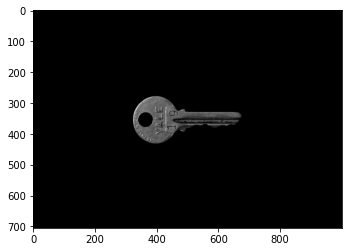

In [2]:
img = cv2.imread('key.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img_gray, cmap='gray')

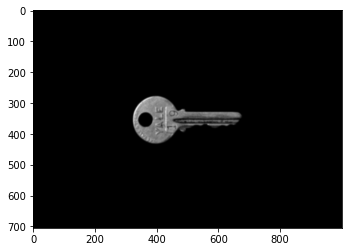

In [3]:
img_blurred = cv2.GaussianBlur(img_gray, (5, 5), 3)

plt.imshow(img_blurred, cmap='gray')

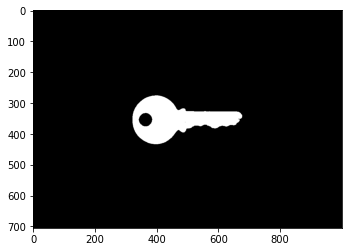

In [4]:
ret, thresh = cv2.threshold(img_blurred, 5, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')

In [5]:
rows, cols = img_gray.shape

In [6]:
contours_index = []

for i in range(rows):
    c = 0 # counter for every pixel that find
    temp = []
    for j in range(cols):
        if (thresh[i-1, j] != 255 or thresh[i+1, j] != 255 or thresh[i, j-1] != 255 or thresh[i, j+1] != 255) and thresh[i, j] == 255:
            temp.append([j, i]) # in (x, y) format
            c += 1
    if c > 2:
        contours_index.append(temp[0])
        contours_index.append(temp[-1])
    elif c == 2:
        contours_index.append(temp[0])
        contours_index.append(temp[1])
        
for j in range(cols):
    c = 0 # counter for every pixel that find
    temp = []
    for i in range(rows):
        if (thresh[i-1, j] != 255 or thresh[i+1, j] != 255 or thresh[i, j-1] != 255 or thresh[i, j+1] != 255) and thresh[i, j] == 255:
            temp.append([j, i]) # in (x, y) format
            c += 1
    if c > 2:
        contours_index.append(temp[0])
        contours_index.append(temp[-1])
    elif c == 2:
        contours_index.append(temp[0])
        contours_index.append(temp[1])

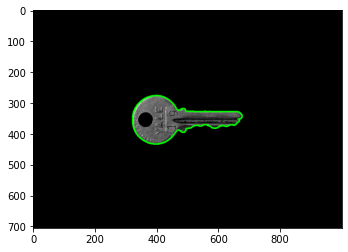

In [7]:
for contour in contours_index:
    cv2.circle(img, (contour[0], contour[1]), 1, (0, 255, 0), 2)

plt.imshow(img)